Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


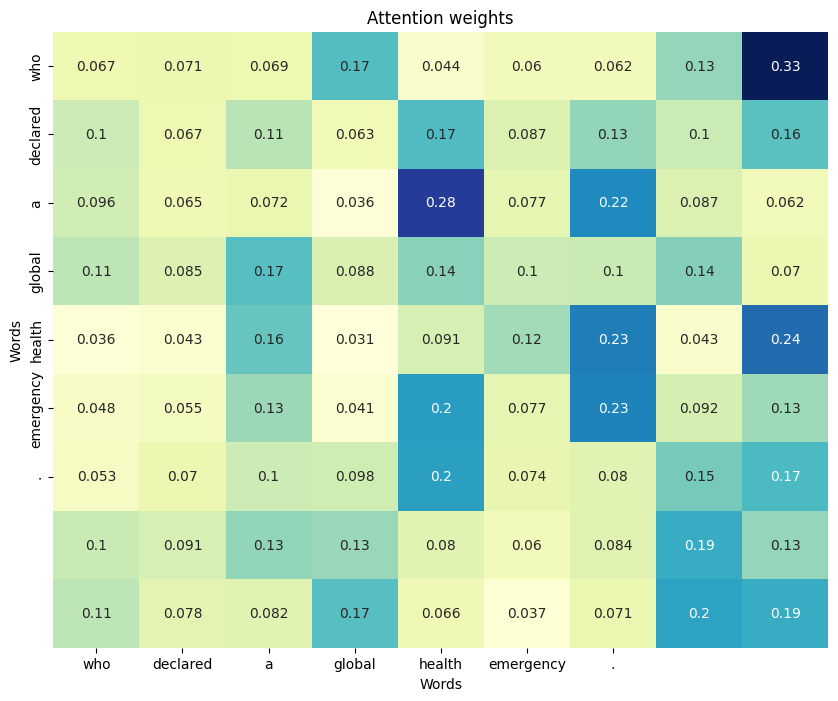

In [17]:
from transformers import BertTokenizer, BertModel
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Dummy sentence
sentence = "WHO declared a global health emergency."

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Preprocess input
input_ids = torch.tensor([tokenizer.encode(sentence, add_special_tokens=True)])

# Forward pass through the model
outputs = model(input_ids)

# Extract attention weights
attention_weights = outputs.attentions

# Visualize attention weights for the first layer and first attention head
attention_layer = 0
attention_head = 0
attention_weights_layer = attention_weights[attention_layer][0][attention_head].detach().numpy()

# Plot the attention weights using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights_layer, cmap='YlGnBu', xticklabels=tokenizer.tokenize(sentence), yticklabels=tokenizer.tokenize(sentence), cbar=False, annot=True)
plt.title("Attention weights")
plt.xlabel("Words")
plt.ylabel("Words")
plt.show()
